In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [8]:
test_df = pd.read_csv('cifr/test.csv')
train_df = pd.read_csv('cifr/train.csv')

x_train = train_df.drop('label',axis = 1).values 
x_test = test_df.drop('label',axis = 1).values

y_train = train_df['label'].values
y_test = test_df['label'].values

(50000, 3072)


In [9]:
x_train = x_train.reshape(-1,32,32,3)/255
x_test = x_test.reshape(-1,32,32,3)/255

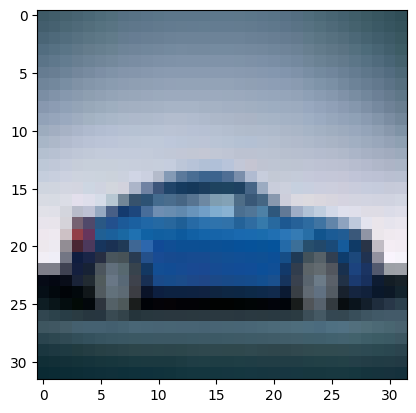

In [12]:
plt.imshow(x_train[262])

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),   # Flatten RGB image
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),        # 1st hidden layer
    keras.layers.Dense(256, activation='relu'),        # 2nd hidden layer
    keras.layers.Dense(128, activation='relu'),        # 3rd hidden layer
    keras.layers.Dense(10, activation='softmax')       # Output layer (10 classes)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape              ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                │ (None, 3072)              │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_8 (Dense)                    │ (None, 1024)              │      3,146,752 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_9 (Dense)                    │ (None, 512)               │        524,800 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_10 (Dense)                   │ (None, 256)               │        131,328 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_11 (Dense)                   │ (None, 128)               │         32,896 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_12 (Dense)                   │ (None, 10)                │          1,290 │
└────────────────────────────────────┴───────────────────────────┴────────────────┘

 Total params: 3,837,066 (14.64 MB)

 Trainable params: 3,837,066 (14.64 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3320 - loss: 1.8608 - val_accuracy: 0.3861 - val_loss: 1.6885
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4098 - loss: 1.6585 - val_accuracy: 0.3963 - val_loss: 1.6832
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4434 - loss: 1.5703 - val_accuracy: 0.4250 - val_loss: 1.6273
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4626 - loss: 1.5074 - val_accuracy: 0.4445 - val_loss: 1.5381
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4812 - loss: 1.4570 - val_accuracy: 0.4650 - val_loss: 1.4805
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4952 - loss: 1.4147 - val_accuracy: 0.4670 - val_loss: 1.4794
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5103 - loss: 1.3753 - val_accuracy: 0.4853 - val_loss: 1.4659
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5243 - lo

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4962 - loss: 1.4052
Loss=1.405
Accuracy=0.496


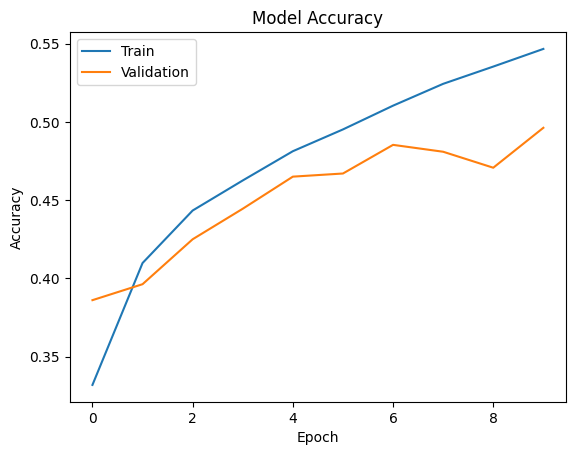

In [24]:
# Cell 9: Plot training and validation accuracy across epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

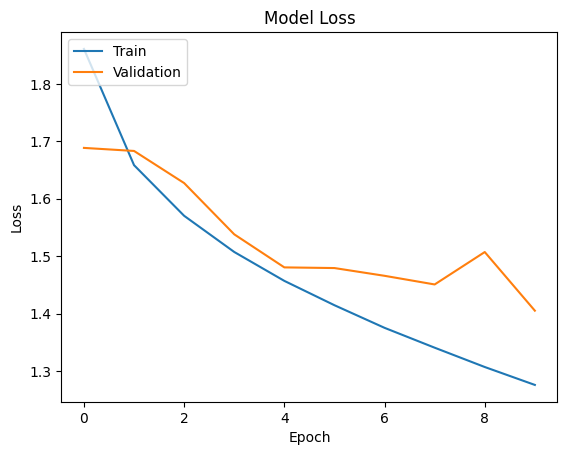

In [25]:
# Cell 10: Plot training and validation loss across epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
f